In [12]:
from google.colab import files
uploaded = files.upload()

Saving food_establishments.csv to food_establishments.csv


In [27]:
import pandas as pd
import numpy as np

# Load the CSVs
food_waste_df = pd.read_csv("food_waste_data.csv")  # Adjust file path if needed
food_establishments_df = pd.read_csv("food_establishments.csv")

# Display head
print("Food Waste Data:")
print(food_waste_df.head())

print("\nFood Establishments Data:")
print(food_establishments_df.head())


Food Waste Data:
   Year  Food Waste Disposed of ('000 tonnes)  \
0  2023                                   623   
1  2022                                   667   
2  2021                                   663   
3  2020                                   539   
4  2019                                   607   

   Food Waste Recycled ('000 tonnes)  \
0                                132   
1                                146   
2                                154   
3                                126   
4                                136   

   Total Food Waste Generated ('000 tonnes) Recycling Rate (%)  
0                                       755                18%  
1                                       813                18%  
2                                       817                19%  
3                                       665                19%  
4                                       744                18%  

Food Establishments Data:
                              

In [28]:
print(food_waste_df.info())  # Check dtypes
print(food_establishments_df.info())

# Check for null values
print(food_waste_df.isnull().sum())
print(food_establishments_df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year                                      5 non-null      int64 
 1   Food Waste Disposed of ('000 tonnes)      5 non-null      int64 
 2   Food Waste Recycled ('000 tonnes)         5 non-null      int64 
 3   Total Food Waste Generated ('000 tonnes)  5 non-null      int64 
 4   Recycling Rate (%)                        5 non-null      object
dtypes: int64(4), object(1)
memory usage: 332.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DataSeries  5 non-null      object
 1   2023        5 non-null      int64 
 2   2022        5 non-null      int64 
 3   2021        5 non-null      int64 
 4   2020 

In [29]:
#we have to reshape establishment csv to align it with Food waste CSV structure

food_establishments_df = pd.melt(
    food_establishments_df,
    id_vars=["DataSeries"],
    var_name="Year",
    value_name="Count"
)

# converting year to numeric type
food_establishments_df["Year"] = food_establishments_df["Year"].astype(int)

# transformed data
print(food_establishments_df.head())

# Pivot so that each dataseries becomes its own column
food_establishments_df = food_establishments_df.pivot(index="Year", columns="DataSeries", values="Count")

# reset index
food_establishments_df.reset_index(inplace=True)

# final data we are going to use
print(food_establishments_df.head())


                                  DataSeries  Year  Count
0             Non-Retail Food Establishments  2023   2425
1                                 Food Shops  2023  22747
2                                Food Stalls  2023  14178
3                               Supermarkets  2023    691
4  National Environment Agency Hawker Stalls  2023  13430
DataSeries  Year  Food Shops  Food Stalls  \
0           2019       19675        14569   
1           2020       20176        14773   
2           2021       21073        14455   
3           2022       21953        14328   
4           2023       22747        14178   

DataSeries  National Environment Agency Hawker Stalls  \
0                                               13400   
1                                               13483   
2                                               13570   
3                                               13390   
4                                               13430   

DataSeries  Non-Retail Food Establishm

In [30]:

food_waste_df["Year"] = food_waste_df["Year"].astype(int)

# Merge both datasets on 'Year'
merged_df = pd.merge(food_waste_df, food_establishments_df, on="Year")

# Display the final merged dataset
print(merged_df.head())

   Year  Food Waste Disposed of ('000 tonnes)  \
0  2023                                   623   
1  2022                                   667   
2  2021                                   663   
3  2020                                   539   
4  2019                                   607   

   Food Waste Recycled ('000 tonnes)  \
0                                132   
1                                146   
2                                154   
3                                126   
4                                136   

   Total Food Waste Generated ('000 tonnes) Recycling Rate (%)  Food Shops  \
0                                       755                18%       22747   
1                                       813                18%       21953   
2                                       817                19%       21073   
3                                       665                19%       20176   
4                                       744                18%       19675

In [31]:


# Rename columns to remove extra characters
merged_df.rename(columns={
    "Total Food Waste Generated ('000 tonnes)": "Total Food Waste",
    "Food Waste Disposed of ('000 tonnes)": "Food Waste Disposed",
    "Food Waste Recycled ('000 tonnes)": "Food Waste Recycled",
    "Recycling Rate (%)": "Recycling Rate"
}, inplace=True)

# Verify column names after renaming
print(merged_df.columns)

# Save the merged dataset to a new CSV file
merged_df.to_csv("merged_food_waste_establishments.csv", index=False)

print("CSV file saved successfully!")

#downloading it for team
from google.colab import files
files.download("merged_food_waste_establishments.csv")

Index(['Year', 'Food Waste Disposed', 'Food Waste Recycled',
       'Total Food Waste', 'Recycling Rate', 'Food Shops', 'Food Stalls',
       'National Environment Agency Hawker Stalls',
       'Non-Retail Food Establishments', 'Supermarkets'],
      dtype='object')
CSV file saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

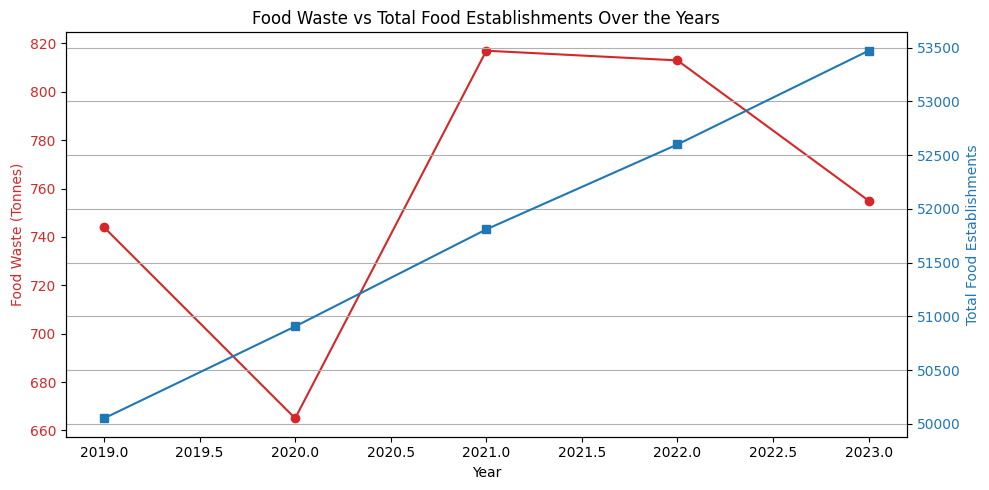

In [34]:
# Total Food Waste vs Total Establishments
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary Y-Axis for Food Waste
ax1.set_xlabel("Year")
ax1.set_ylabel("Food Waste (Tonnes)", color='tab:red')
ax1.plot(merged_df['Year'], merged_df['Total Food Waste'], marker='o', color='tab:red', label="Food Waste (Tonnes)")
ax1.tick_params(axis='y', labelcolor='tab:red')

# Compute total establishments (sum of all categories)
merged_df["Total Establishments"] = (
    merged_df["Food Shops"] +
    merged_df["Food Stalls"] +
    merged_df["National Environment Agency Hawker Stalls"] +
    merged_df["Supermarkets"] +
    merged_df["Non-Retail Food Establishments"]
)

# Secondary Y-Axis for Total Food Establishments
ax2 = ax1.twinx()
ax2.set_ylabel("Total Food Establishments", color='tab:blue')
ax2.plot(merged_df['Year'], merged_df['Total Establishments'], marker='s', color='tab:blue', label="Total Food Establishments")
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and Grid
plt.title("Food Waste vs Total Food Establishments Over the Years")
fig.tight_layout()
plt.grid(True)
plt.show()

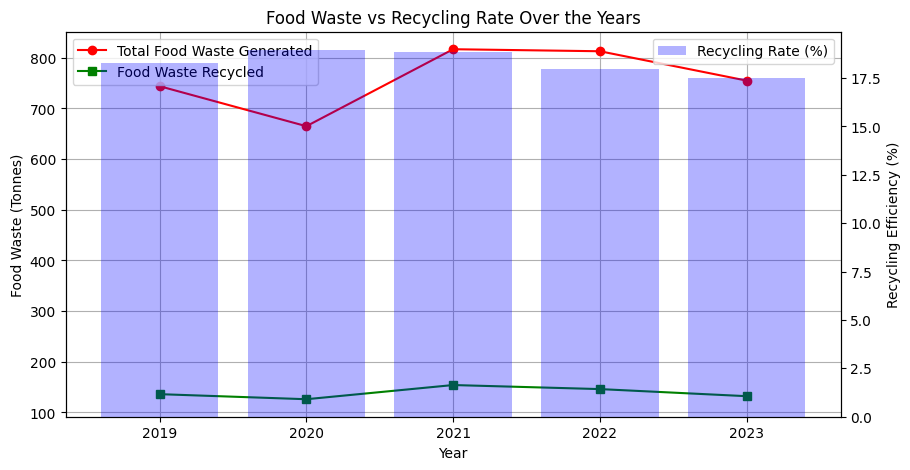

In [35]:
#Food waste vs Recycling rate

file_path = "food_waste_data.csv"
df = pd.read_csv(file_path)

# cleaning column names as it has some special chars
df.columns = df.columns.str.replace(r"\s*\(.*\)", "", regex=True)

# Calculate Recycling Efficiency (%)
df["Recycling Efficiency (%)"] = (df["Food Waste Recycled"] / df["Total Food Waste Generated"]) * 100

# Sort by year
df = df.sort_values(by="Year")


fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Total Food Waste Generated and Food Waste Recycled
ax1.plot(df["Year"], df["Total Food Waste Generated"], marker='o', label="Total Food Waste Generated", color='red')
ax1.plot(df["Year"], df["Food Waste Recycled"], marker='s', label="Food Waste Recycled", color='green')

ax1.set_xlabel("Year")
ax1.set_ylabel("Food Waste (Tonnes)")
ax1.legend(loc="upper left")
ax1.grid(True)

# Second Y-axis for Recycling Efficiency (%)
ax2 = ax1.twinx()
ax2.bar(df["Year"], df["Recycling Efficiency (%)"], alpha=0.3, color='blue', label="Recycling Rate (%)")
ax2.set_ylabel("Recycling Efficiency (%)")
ax2.legend(loc="upper right")


plt.title("Food Waste vs Recycling Rate Over the Years")

plt.show()